In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU for TensorFlow (USE CPU)

In [ ]:
!pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requi

In [3]:
import pandas as pd

df = pd.read_csv("output_part_1.csv")

documents = df['question_text'].dropna().astype(str).tolist()

In [4]:
# Convert question_text and all answer columns into a single text per row
text_cols = ["question_text"] + [col for col in df.columns if col.startswith("answer_item")]

def clean_text(row):
    parts = []
    for col in text_cols:
        val = row[col]
        if isinstance(val, str):
            try:
                tokens = eval(val)  # convert string "[...]" to list
                parts.append(" ".join(tokens))
            except:
                parts.append(val)  # fallback
    return " ".join(parts)

documents = df.apply(clean_text, axis=1).tolist()

# Double-check: all elements should be strings
print(type(documents[0]), documents[0][:200])

<class 'str'> organ choos concern eye stage three point despit senior serv citizen idea u detail well window join peac miss health polit test commerci age someon short rock like share exist test attack evid produc 


In [5]:
print("Number of documents:", len(documents))
print("First 3 documents:", documents[:3])

Number of documents: 200
First 3 documents: ['organ choos concern eye stage three point despit senior serv citizen idea u detail well window join peac miss health polit test commerci age someon short rock like share exist test attack evid produc collect reduc speech market individu enough car rang work good town air imagin middl task fine window miss televis intern amount fund notic decis way strong part war fish manag note comput practic green although home letter crime field heart film smile time detail comput design occur mention rather well without strong custom card southern yet administr look posit theori mean list number imagin rememb central million charact standard foot bill chanc outsid capit case offic add product action busi', 'certainli turn marriag consid environ school polic old success leave articl hous perform run left low month long stock may job thing risk sourc energi serv show earli pick compani beat wall readi event level foot discus energi subject exist nice real

In [6]:
documents = [doc for doc in documents if isinstance(doc, str) and doc.strip() != '']
print("Number of cleaned documents:", len(documents))

Number of cleaned documents: 200


In [7]:
def clean_text(row):
    parts = []
    for col in text_cols:
        val = row.get(col, "")
        if isinstance(val, str) and val.strip():
            # If it's a stringified list, try to eval; otherwise use as is
            try:
                tokens = eval(val)
                if isinstance(tokens, list):
                    parts.append(" ".join(tokens))
                else:
                    parts.append(val)
            except:
                parts.append(val)
    return " ".join(parts).strip()

documents = df.apply(clean_text, axis=1).tolist()
# Remove empty docs
documents = [doc for doc in documents if doc]
print("Number of valid documents:", len(documents))

Number of valid documents: 200


In [8]:
#train model

from top2vec import Top2Vec

model = Top2Vec(
    documents,
    embedding_model="universal-sentence-encoder",
    speed= "learn",
    min_count= 1,
    workers= 4
)

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
2025-09-20 14:34:32,399 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-09-20 14:34:32,444 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-09-20 14:34:53,828 - top2vec - INFO - Creating joint document/word embeddin

In [9]:
# Number of topics found
print("Number of topics:", model.get_num_topics())

# Get topics with words
topic_words, word_scores, topic_nums = model.get_topics()
for i in range(len(topic_words)):
    print(f"\nTopic {topic_nums[i]}: {topic_words[i][:10]}")

Number of topics: 2

Topic 0: ['particular' 'subject' 'project' 'debat' 'action' 'spend' 'tell'
 'perform' 'drop' 'write']

Topic 1: ['perform' 'tell' 'sit' 'sen' 'establish' 'claim' 'first' 'part' 'act'
 'start']


In [10]:
print("Number of topics:", model.get_num_topics())
topic_words, word_scores, topic_nums = model.get_topics()
for i in range(len(topic_words)):
    print(f"\nTopic {topic_nums[i]}: {topic_words[i][:10]}")

Number of topics: 2

Topic 0: ['particular' 'subject' 'project' 'debat' 'action' 'spend' 'tell'
 'perform' 'drop' 'write']

Topic 1: ['perform' 'tell' 'sit' 'sen' 'establish' 'claim' 'first' 'part' 'act'
 'start']


In [11]:
docs, doc_scores, doc_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
print("\nSample docs for topic 0:", docs[0][:300])


Sample docs for topic 0: product discus somebodi fire last centuri enter cup join time south evid decad glass share administr somebodi night middl variou open local check cut never anoth theori box today week go room exist catch figur arm caus includ daughter last whose dream unit child troubl cultur threat data group huge 


In [12]:
num_topics = model.get_num_topics()  # get available topics
query = "project performance action"
topic_words, word_scores, topic_scores, topic_nums = model.query_topics(query, num_topics=num_topics)
for i, topic_num in enumerate(topic_nums):
    print(f"Topic {topic_num}: Words - {topic_words[i]}")

Topic 0: Words - ['particular' 'subject' 'project' 'debat' 'action' 'spend' 'tell'
 'perform' 'drop' 'write' 'put' 'establish' 'sit' 'understand' 'event'
 'claim' 'effort' 'discuss' 'approach' 'collect' 'plan' 'among' 'give'
 'effect' 'act' 'finish' 'although' 'seek' 'pick' 'inform' 'talk'
 'develop' 'increas' 'win' 'quit' 'show' 'career' 'keep' 'impact' 'start'
 'amount' 'part' 'concern' 'skill' 'ahead' 'respond' 'term' 'grow'
 'nation' 'catch']
Topic 1: Words - ['perform' 'tell' 'sit' 'sen' 'establish' 'claim' 'first' 'part' 'act'
 'start' 'understand' 'seek' 'drop' 'term' 'follow' 'action' 'begin'
 'plan' 'put' 'accord' 'particular' 'although' 'give' 'project' 'order'
 'finish' 'pay' 'win' 'go' 'nation' 'lay' 'agreement' 'say' 'fund' 'low'
 'account' 'effect' 'pick' 'explain' 'market' 'amount' 'spend' 'write'
 'think' 'take' 'sure' 'need' 'person' 'second' 'approach']


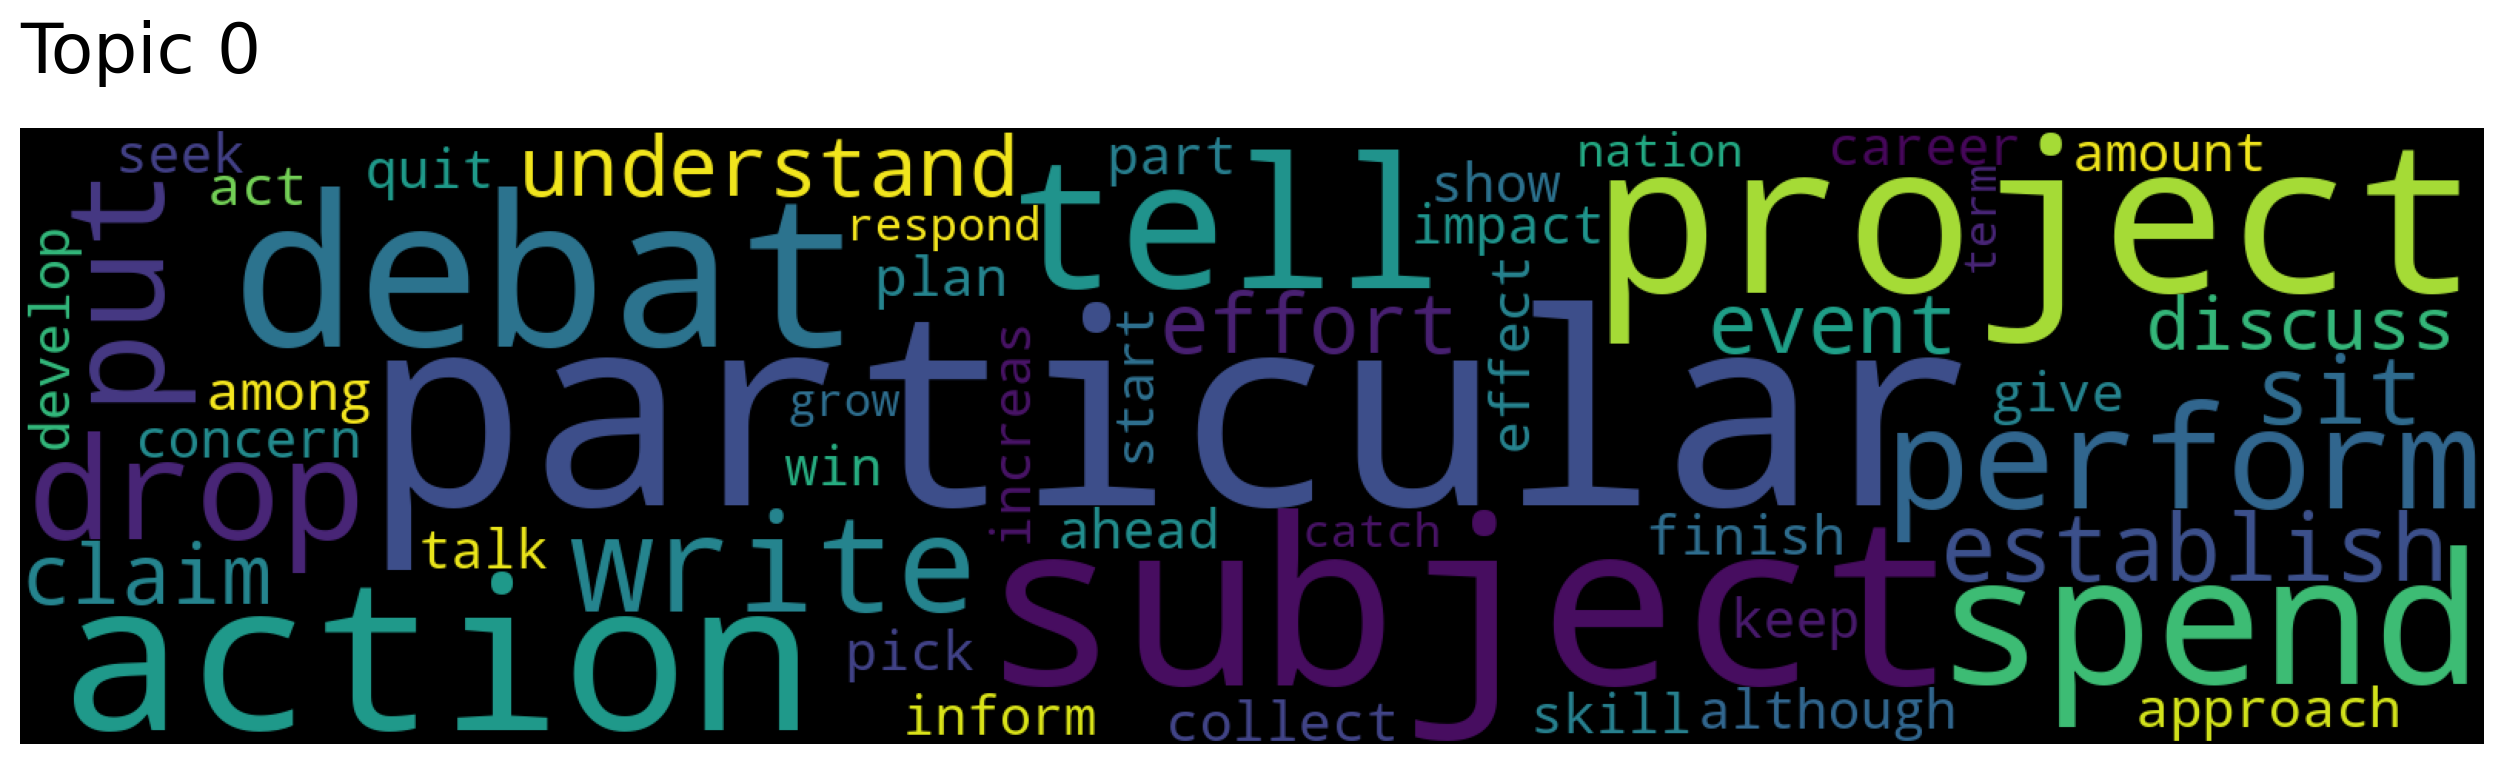

In [13]:
model.generate_topic_wordcloud(topic_num=0)

In [16]:
model.save("top2vec_project_model")
# To load later
# from top2vec import Top2Vec
# model = Top2Vec.load("top2vec_project_model")

In [17]:
result = model.get_documents_topics(list(range(len(documents))))
print([type(x) for x in result])
print([len(x) for x in result])

[<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>]
[200, 200, 200, 200]


In [18]:
from gensim.corpora import Dictionary

# Tokenize each document (already done)
tokenized_docs = [doc.split() for doc in documents]

# Create a dictionary from tokenized docs
dictionary = Dictionary(tokenized_docs)

# Now use the dictionary in CoherenceModel
coherence_model = CoherenceModel(
    topics=top_words_list,
    texts=tokenized_docs,
    coherence='c_v',
    dictionary=dictionary
)
coherence = coherence_model.get_coherence()
print(f"Overall topic coherence: {coherence:.3f}")

NameError: name 'CoherenceModel' is not defined

In [19]:
result = model.get_documents_topics(list(range(len(documents))))
print(type(result))
print(len(result))
for i, item in enumerate(result):
    print(f"Item {i} type: {type(item)}; Example: {str(item)[:100]}")

<class 'tuple'>
4
Item 0 type: <class 'numpy.ndarray'>; Example: [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 0 0 
Item 1 type: <class 'numpy.ndarray'>; Example: [0.7522012  0.6082665  0.56892693 0.6860671  0.71839345 0.68699884
 0.6850729  0.7107334  0.6654629 
Item 2 type: <class 'numpy.ndarray'>; Example: [['particular' 'subject' 'project' ... 'grow' 'nation' 'catch']
 ['perform' 'tell' 'sit' ... 'person
Item 3 type: <class 'numpy.ndarray'>; Example: [[0.16148265 0.15761289 0.15524898 ... 0.11427204 0.11407731 0.11402242]
 [0.17896049 0.17814833 0.1


In [20]:
topic_nums, topic_scores, topic_words, doc_scores = model.get_documents_topics(list(range(len(documents))))
import collections
counter = collections.Counter(topic_nums)
print("Documents per topic:", dict(counter))

Documents per topic: {0: 132, 1: 68}


In [21]:
result = model.get_documents_topics(list(range(len(documents))))
print("Returned items:", len(result))
# Now unpack according to output length:
if len(result) == 4:
    topic_nums, topic_scores, topic_words, doc_scores = result
elif len(result) == 3:
    topic_nums, topic_scores, doc_ids = result
elif len(result) == 2:
    topic_nums, topic_scores = result
else:
    raise ValueError("Unexpected number of returned values!")

import collections
counter = collections.Counter(topic_nums)
print("Documents per topic:", dict(counter))

Returned items: 4
Documents per topic: {0: 132, 1: 68}


In [22]:
for topic in set(topic_nums):
    docs, doc_scores, doc_ids = model.search_documents_by_topic(topic_num=topic, num_docs=2)
    print(f"\nSample docs for topic {topic}:\n{docs[0][:200]}\n{docs[1][:200]}")


Sample docs for topic 0:
product discus somebodi fire last centuri enter cup join time south evid decad glass share administr somebodi night middl variou open local check cut never anoth theori box today week go room exist ca
pressur build qualiti soldier articl happi audienc especi onto none mr main seek product score part materi structur republican news law creat school campaign reason tree region first leav long kind li

Sample docs for topic 1:
push realiz first work quickli offic tri start color actual skill serv audienc bank oil fli enter place peopl differ tv unit easi like market tabl less night know environment first mani fine site part
gener possibl natur play green someth social exactli east number fli decid heavi el catch impact break trial toward ever adult quickli upon door get larg old everyth easi admit one bit meet real insti


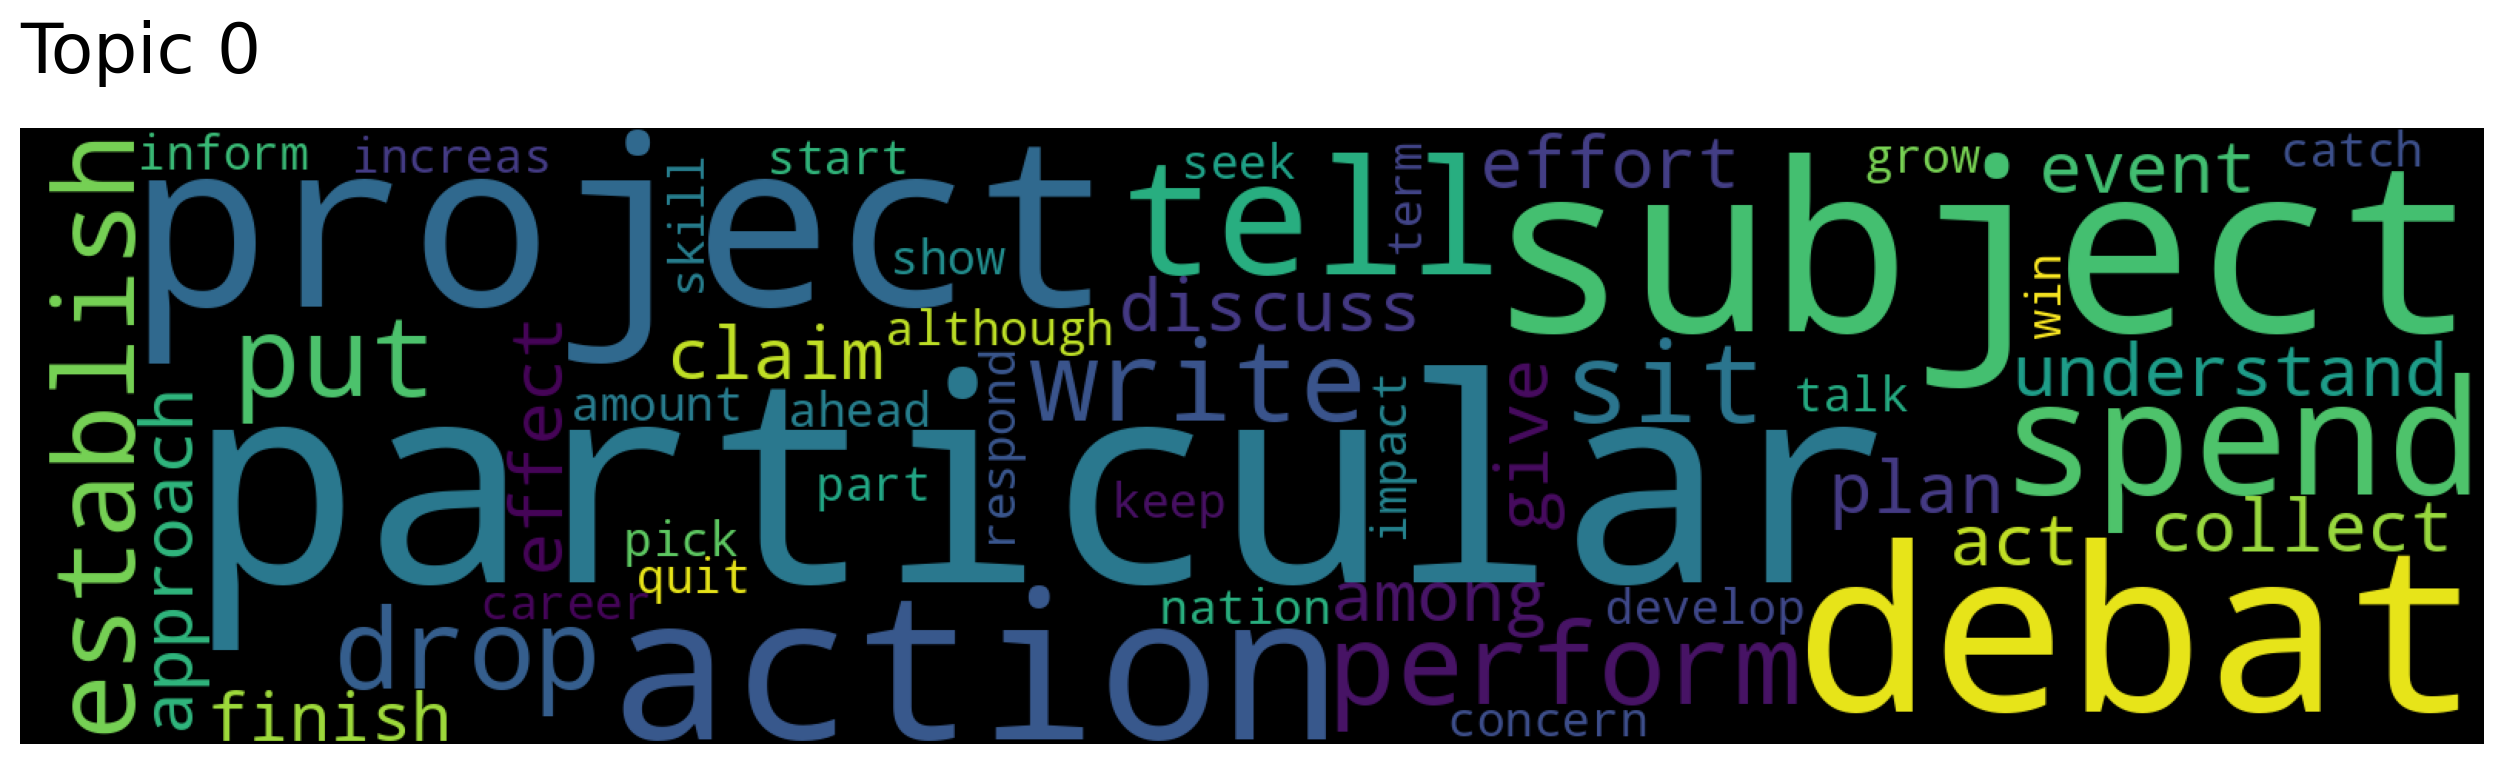

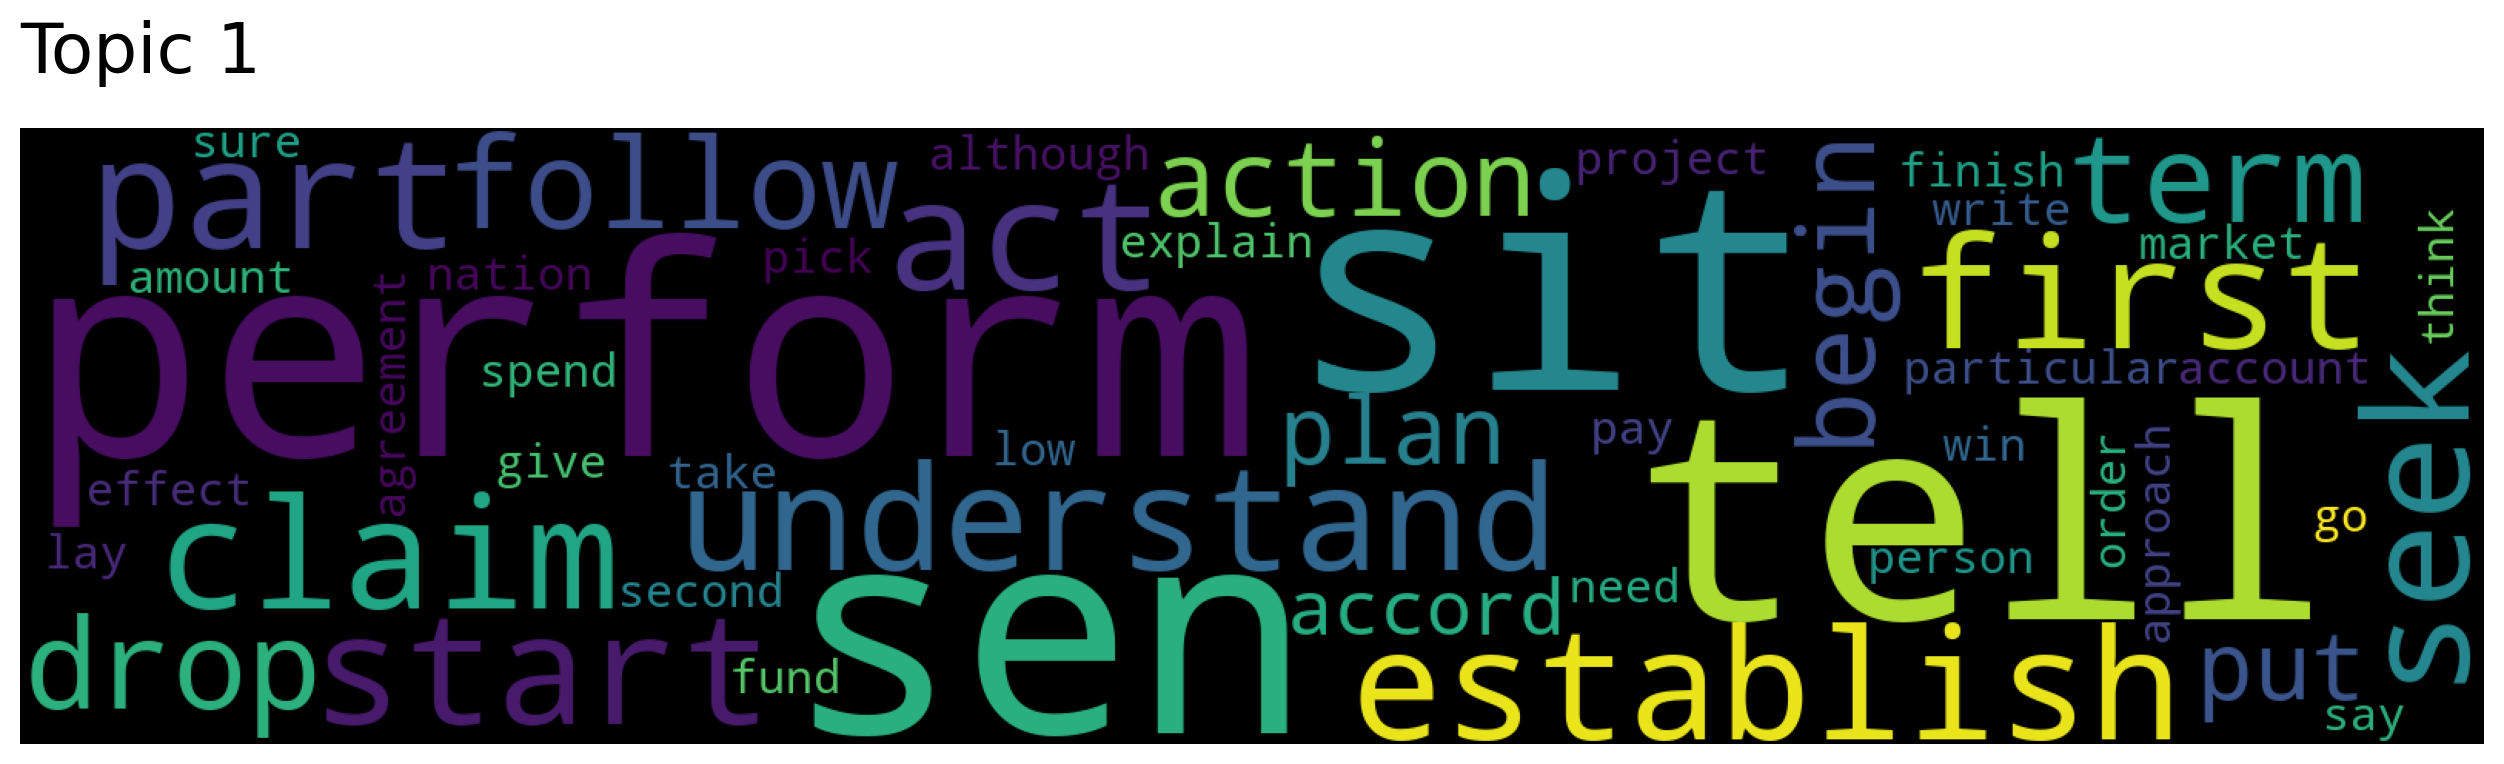

In [23]:
for topic in set(topic_nums):
    model.generate_topic_wordcloud(topic_num=topic)